# Fear&Greed + DAX visualization

## Import librairies

In [1]:
import yfinance as yf
import mplfinance as mpf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from PIL import Image
from IPython.display import display

## Flowchart

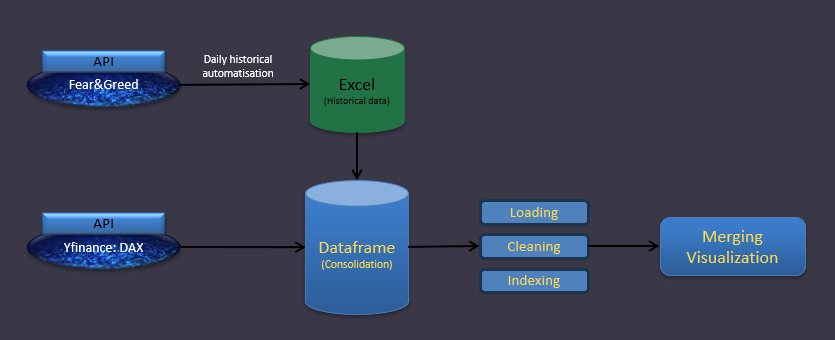

In [2]:
image_path = r"C:\Users\Jeff\Pictures\DAX+F&G.png"
image = Image.open(image_path)
display(image)

## DAX loading

In [3]:
start_date = "2023-01-01"
end_date = dt.date.today().strftime("%Y-%m-%d")
dax = yf.download("^GDAXI", start=start_date, end=end_date)
dax

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,13992.709961,14095.910156,13976.440430,14069.259766,14069.259766,34978500
2023-01-03,14116.070312,14293.870117,14083.759766,14181.669922,14181.669922,57907500
2023-01-04,14266.980469,14492.780273,14264.599609,14490.780273,14490.780273,76221600
2023-01-05,14451.230469,14501.599609,14403.730469,14436.309570,14436.309570,60947500
2023-01-06,14476.719727,14610.230469,14388.980469,14610.019531,14610.019531,55433700
...,...,...,...,...,...,...
2023-06-05,16079.860352,16114.839844,15928.440430,15963.889648,15963.889648,63777600
2023-06-06,15939.309570,16009.280273,15925.559570,15992.440430,15992.440430,52413000
2023-06-07,15998.099609,16020.280273,15909.849609,15960.559570,15960.559570,67870200


### DAX visualization (candlestick type)

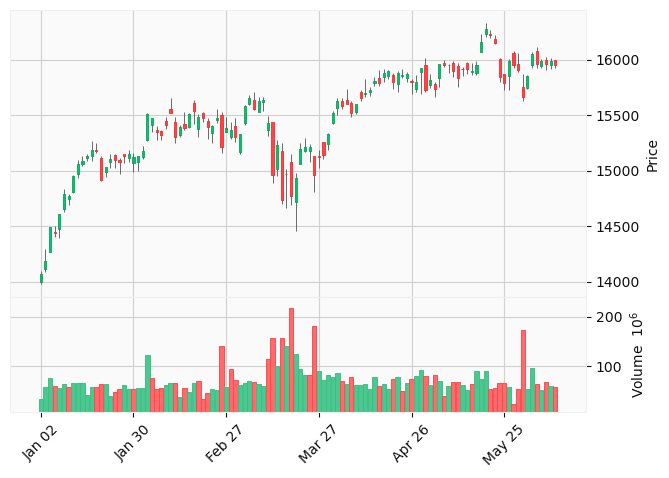

In [4]:
dax.index = pd.to_datetime(dax.index)
mpf.plot(dax, type="candle", volume=True, style="yahoo")

## Fear&Greed loading

In [5]:
excel_file = r"C:\Users\Jeff\Desktop\Desk\9-Jupyter_Notebook\Fear&Greed\fear_greed_data.xlsx"

data = pd.read_excel(excel_file)
data = data.rename(columns={"last_update": "Date"})
data = data.rename(columns={"value": "Close"})

data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].dt.strftime("%Y-%m-%d")
data["Date"] = pd.to_datetime(data["Date"])

data

,Close,description,Date
0,54.700000,greed,2023-03-06
1,53.700000,neutral,2023-03-07
2,53.700000,neutral,2023-03-08
3,45.657143,neutral,2023-03-08
4,45.714286,neutral,2023-03-08
...,...,...,...
123,74.885714,greed,2023-06-08
124,74.885714,greed,2023-06-08
125,76.371429,extreme greed,2023-06-09
126,77.428571,extreme greed,2023-06-09


In [6]:
data.set_index("Date", inplace=True)
data

,Close,description
Date,,
2023-03-06,54.700000,greed
2023-03-07,53.700000,neutral
2023-03-08,53.700000,neutral
2023-03-08,45.657143,neutral
2023-03-08,45.714286,neutral
...,...,...
2023-06-08,74.885714,greed
2023-06-08,74.885714,greed
2023-06-09,76.371429,extreme greed


In [7]:
data["bar_heights"] = data["Close"] - 50
data

,Close,description,bar_heights
Date,,,
2023-03-06,54.700000,greed,4.700000
2023-03-07,53.700000,neutral,3.700000
2023-03-08,53.700000,neutral,3.700000
2023-03-08,45.657143,neutral,-4.342857
2023-03-08,45.714286,neutral,-4.285714
...,...,...,...
2023-06-08,74.885714,greed,24.885714
2023-06-08,74.885714,greed,24.885714
2023-06-09,76.371429,extreme greed,26.371429


### Fear&Greed visualization (bar by 50 main axis)

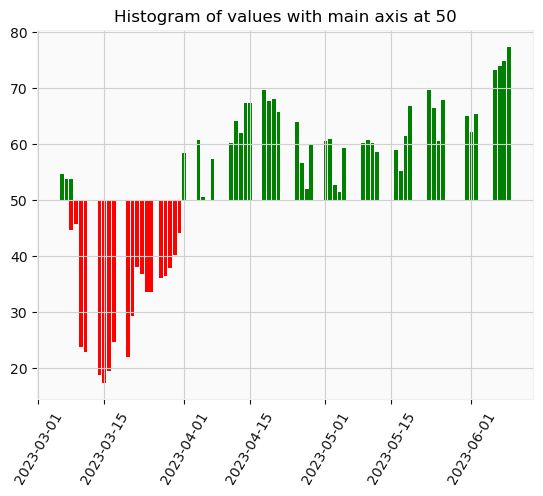

In [8]:
plt.bar(data.index, data["bar_heights"], bottom=50, color=["g" if val >= 50 else "r" for val in data["Close"]])
plt.title("Histogram of values with main axis at 50")
_=plt.xticks(rotation=60)

## Merging

In [9]:
merged_df = dax.merge(data, on="Date")
merged_df

,Open,High,Low,Close_x,Adj Close,Volume,Close_y,description,bar_heights
Date,,,,,,,,,
2023-03-06,15597.900391,15677.929688,15587.780273,15653.580078,15653.580078,69392600,54.700000,greed,4.700000
2023-03-07,15638.440430,15706.370117,15544.070312,15559.530273,15559.530273,68603300,53.700000,neutral,3.700000
2023-03-08,15528.809570,15667.209961,15524.849609,15631.870117,15631.870117,64604200,53.700000,neutral,3.700000
2023-03-08,15528.809570,15667.209961,15524.849609,15631.870117,15631.870117,64604200,45.657143,neutral,-4.342857
2023-03-08,15528.809570,15667.209961,15524.849609,15631.870117,15631.870117,64604200,45.714286,neutral,-4.285714
...,...,...,...,...,...,...,...,...,...
2023-06-08,15951.610352,16019.000000,15913.950195,15989.959961,15989.959961,59532100,74.885714,greed,24.885714
2023-06-08,15951.610352,16019.000000,15913.950195,15989.959961,15989.959961,59532100,74.885714,greed,24.885714
2023-06-09,15993.019531,15998.900391,15924.509766,15949.839844,15949.839844,58242200,76.371429,extreme greed,26.371429


## Final visualization

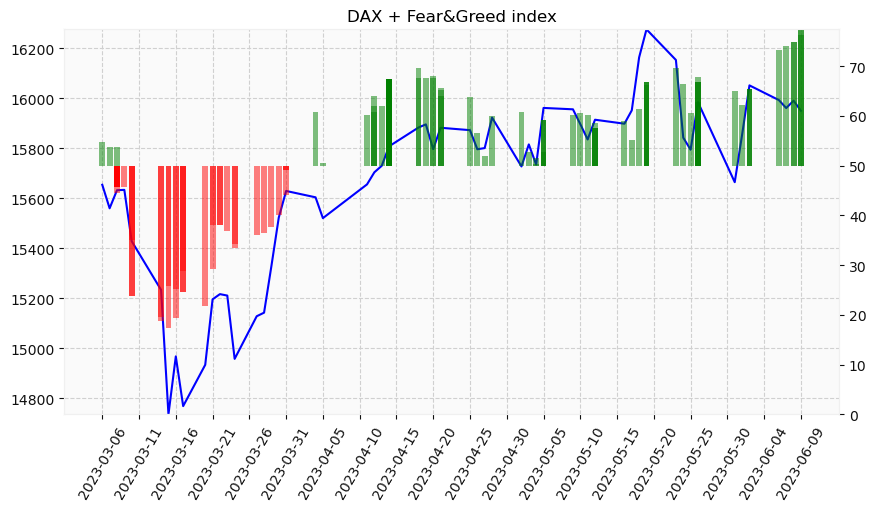

In [15]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title("DAX + Fear&Greed index")

ax1.plot(merged_df.index, merged_df["Close_x"], color="blue", label="Close_x")
ax1.set_ylim([merged_df["Close_x"].min(), merged_df["Close_x"].max()])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)

ax2 = ax1.twinx()

ax2.bar(merged_df.index, merged_df["bar_heights"], bottom=50, alpha=0.5, color=["g" if val >= 50 else "r" for val in merged_df["Close_y"]])
ax2.set_ylim([0, merged_df["Close_y"].max()])

tick_interval = 5
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=tick_interval, offset=0))

ax1.grid(which="both", linestyle="--")
ax2.grid(False)